In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from pycocotools.coco import COCO

In [4]:
dataDir='./'
dataType='val2014'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
imageDir = '{}/{}/'.format(dataDir, dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=4.89s)
creating index...
index created!


In [5]:
# Load categories for the given ids
ids = 1
cats = coco.loadCats(ids=ids)
print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}]


In [6]:
# Load images for the given ids
image_ids = coco.getImgIds()
image_id = image_ids[0]  # Change this line to display a different image
image_info = coco.loadImgs(image_id)
print(image_info)

[{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]


In [8]:
# Load annotations for the given ids
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'segmentation': [[376.97, 176.91, 398.81, 176.91, 396.38, 147.78, 447.35, 146.17, 448.16, 172.05, 448.16, 178.53, 464.34, 186.62, 464.34, 192.28, 448.97, 195.51, 447.35, 235.96, 441.69, 258.62, 454.63, 268.32, 462.72, 276.41, 471.62, 290.98, 456.25, 298.26, 439.26, 292.59, 431.98, 308.77, 442.49, 313.63, 436.02, 316.86, 429.55, 322.53, 419.84, 354.89, 402.04, 359.74, 401.24, 312.82, 370.49, 303.92, 391.53, 299.87, 391.53, 280.46, 385.06, 278.84, 381.01, 278.84, 359.17, 269.13, 373.73, 261.85, 374.54, 256.19, 378.58, 231.11, 383.44, 205.22, 385.87, 192.28, 373.73, 184.19]], 'area': 12190.44565, 'iscrowd': 0, 'image_id': 391895, 'bbox': [359.17, 146.17, 112.45, 213.57], 'category_id': 4, 'id': 151091}, {'segmentation': [[352.55, 146.82, 353.61, 137.66, 356.07, 112.66, 357.13, 94.7, 357.13, 84.49, 363.12, 73.92, 370.16, 68.64, 370.16, 66.53, 368.4, 63.71, 368.05, 54.56, 361.0, 53.85, 356.07, 50.33, 356.43, 46.46, 364.17, 42.23, 369.1, 35.89, 371.22, 30.96, 376.85, 26.39, 383.54, 22.16, 

In [9]:
# Get category ids that satisfy the given filter conditions
filterClasses = ['laptop', 'tv', 'cell phone']
# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[72, 73, 77]

In [10]:
catID = 15
print(coco.loadCats(ids=catID))

# Get image ids that satisfy the given filter conditions
imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
262148


In [11]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[247584, 576412, 642663, 1209372, 1251030, 1272930, 1277823, 1303789, 1307874, 1312222, 1312550, 1321181, 1324108, 1331011, 1332687, 1371763, 1372845, 1422576, 1837952, 1962686, 2007683, 2061640, 900100262148]


Annotations for Image ID 262148:
COCO_val2014_000000262148.jpg


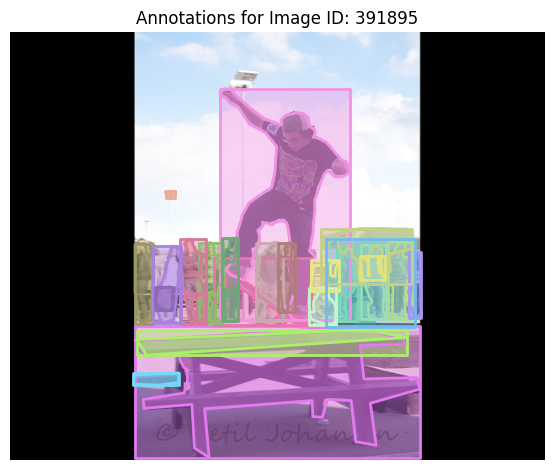

In [14]:
print(f"Annotations for Image ID {imgId}:")
anns = coco.loadAnns(ann_ids)

image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)
image = plt.imread(imageDir + image_path)
plt.imshow(image)

# Display the specified annotations
coco.showAnns(anns, draw_bbox=True)

plt.axis('off')
plt.title('Annotations for Image ID: {}'.format(image_id))
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO


def main():

    coco_annotation_file_path = "annotations/instances_val2014.json"

    coco_annotation = COCO(annotation_file=coco_annotation_file_path)

    # Category IDs.
    cat_ids = coco_annotation.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids)  # The IDs are not necessarily consecutive.

    # All categories.
    cats = coco_annotation.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)

    # Category ID -> Category Name.
    query_id = cat_ids[0]
    query_annotation = coco_annotation.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

    # Category Name -> Category ID.
    query_name = cat_names[2]
    query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")

    # Get the ID of all the images containing the object of the category.
    img_ids = coco_annotation.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    # Pick one image.
    img_id = img_ids[2]
    img_info = coco_annotation.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]
    print(
        f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
    )

    # Get all the annotations for the specified image.
    ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco_annotation.loadAnns(ann_ids)
    print(f"Annotations for Image ID {img_id}:")
    print(anns)

    # Use URL to load image.
    im = Image.open(requests.get(img_url, stream=True).raw)

    # Save image and its labeled version.
    plt.axis("off")
    plt.imshow(np.asarray(im))
    plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    # Plot segmentation and bounding box.
    coco_annotation.showAnns(anns, draw_bbox=True)
    plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)

    return


if __name__ == "__main__":

    main()

loading annotations into memory...
Done (t=6.78s)
creating index...
index created!
Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', '